<a href="https://colab.research.google.com/github/amamra-abdenour/Deep_Learning_Python/blob/master/DeepLearning_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)
print(x_train[0])
print(y_train.shape)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
print(x_train.shape)
print(y_train.shape)

Using TensorFlow backend.


17465344/17464789 [==============================] - 3s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178,

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(max_features, 8, input_length = maxlen))
model.add(Flatten())
model.add(Dense(1,activation= 'sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________



Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 7s 354us/step - loss: 0.6675 - acc: 0.6240 - val_loss: 0.6138 - val_acc: 0.6994
Epoch 2/10
20000/20000 [==============================] - 3s 131us/step - loss: 0.5378

In [0]:
!wget  -O aclImdb.zip http://s3.amazonaws.com/text-datasets/aclImdb.zip

--2019-10-12 14:22:34--  http://s3.amazonaws.com/text-datasets/aclImdb.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.114.61
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.114.61|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60711700 (58M) [application/zip]
Saving to: ‘aclImdb.zip’

aclImdb.zip         100%[===================>]  57.90M  15.4MB/s    in 4.8s    

2019-10-12 14:22:40 (12.1 MB/s) - ‘aclImdb.zip’ saved [60711700/60711700]



In [0]:
import zipfile
with zipfile.ZipFile('aclImdb.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [0]:
import os
imdb_dir = '/content/aclImdb/'
train_dir = os.path.join(imdb_dir,'train')
labels = []
texts = []
for label_type in ['pos','neg']:
  dir_name = os.path.join(train_dir,label_type)
  print(dir_name)
  for f_name in os.listdir(dir_name):
    if f_name[-4:] == '.txt':
      f = open(os.path.join(dir_name,f_name))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

/content/aclImdb/train/pos
/content/aclImdb/train/neg


In [0]:
print(len(labels))
print(len(texts))

print(labels[0])
print(len(texts[0]))

25000
25000
1
1067


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000
tokenizer = Tokenizer(num_words= max_words)
tokenizer.fit_on_texts(texts)
sequences =tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found {} unique tokens'.format(len(word_index)))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print(data.shape)
print(labels.shape)

Found 88582 unique tokens
(25000, 100)
(25000,)


In [0]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [0]:
x_train = data[:training_samples]
y_train = labels[:training_samples]

x_val = data[training_samples:training_samples + validation_samples]
y_val = labels[training_samples:training_samples + validation_samples]

In [0]:
!wget  -O Glove6B.zip http://nlp.stanford.edu/data/glove.6B.zip

--2019-10-12 14:24:17--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-10-12 14:24:17--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-10-12 14:24:18--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘Glove6B.zip’

Glove6B.

In [0]:
import zipfile
with zipfile.ZipFile('Glove6B.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Glove6B/')

In [0]:
import os
import numpy as np
embedding_dim = 100
glove_dir = '/content/Glove6B/'
embedding_index = {}
f = open(os.path.join(glove_dir,'glove.6B.'+str(embedding_dim)+'100d.txt'))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:],dtype='float32')
  embedding_index[word] = coefs
f.close()
#print('Found {} word vectors'.format(embedding_index))

In [0]:
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
       embedding_matrix[i] = embedding_vector

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
print(embedding_matrix.shape)

(10000, 100)


In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 3.4671 - acc: 0.4900 - val_loss: 0.7956 - val_acc: 0.4970
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5548 - acc: 0.7000 - val_loss: 1.1018 - val_acc: 0.4946
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4828 - acc: 0.7800 - val_loss: 1.3417 - val_acc: 0.5054
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4313 - acc: 0.8200 - val_loss: 0.7359 - val_acc: 0.5285
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2335 - acc: 0.9700 - val_loss: 0.7326 - val_acc: 0.5488
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1425 - acc: 0.9850 - val_loss: 0.8407 - val_acc: 0.5347
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3481 - acc: 0.8500 - val_loss: 0.7597 - val_acc: 0.5532
Epoch 8/10
200/200 [========

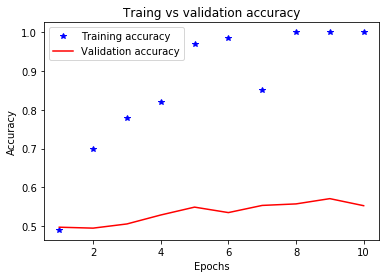

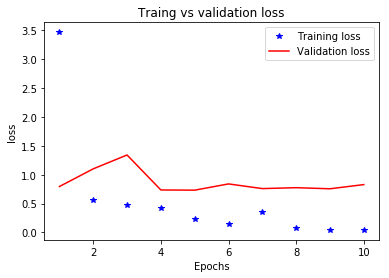

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc, 'b*', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.title('Traing vs validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.figure()

plt.plot(epochs, loss, 'b*', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Traing vs validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss')

plt.show()


In [29]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding

#maxlen = 100
#embedding_dim = 100
#max_words = 10000

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_7 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 6ms/step - loss: 0.6934 - acc: 0.4900 - val_loss: 0.6921 - val_acc: 0.5113
Epoch 2/10
200/200 [==============================] - 1s 4ms/s

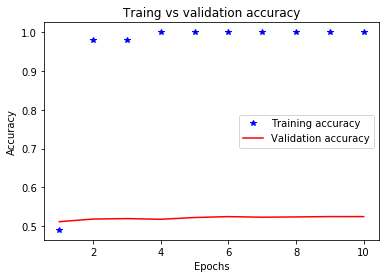

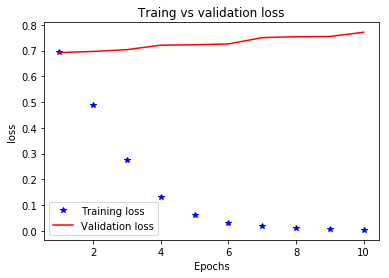

In [30]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc, 'b*', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.title('Traing vs validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.figure()

plt.plot(epochs, loss, 'b*', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Traing vs validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss')

plt.show()

In [0]:
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []

for label_type in ['neg','pos']:
  dir_name = os.path.join(test_dir,label_type)
  for fname in sorted(os.listdir(dir_name)):
    if fname[4:] =='.txt':
      f = open(os.path.join(dir_name,fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [0]:
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [36]:
print(x_test.shape)
print(y_test.shape)

(25000, 100)
(25000,)


In [39]:
model.load_weights('pre_trained_glove_model.h5')
result = model.evaluate(x_test, y_test, batch_size=32)

25000/25000 [==============================] - 2s 63us/step
[0.9286730017089844, 0.50204]
